## Introduction to Databases

### Plotting Graphs 

In [1]:
# !pip install pydotplus
# !pip install graphviz

In [3]:
import io
from itertools import count
import pydotplus
import pandas as pd

import networkx as nx
from networkx import Graph as NXGraph
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt


import matplotlib.colors as mcolors
import collections

from IPython.display import display, Image

In [6]:
#Coletando Data Frame do xls
df = pd.read_excel('familia.xls')
df.head(60)

,filho,pai-mae
0,Nira,Nonato
1,Jovelina,Nonato
2,Josias,Nonato
3,Tiana,Nonato
4,Nonato,Nonato
5,Luiz Fernando,Jovelina
6,Leilane,Jovelina
7,Luiz Fernando,Fernando
8,Leilane,Fernando
9,Patricia,Tiana


In [7]:
## number of classes
len(df['pai-mae'].unique())

9

In [8]:
#possible colors' names
mcolors.cnames.keys()

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [9]:
# Contando o número de pessoas no banco de dados
linhas = len(df['pai-mae'].unique())

# Criando uma lista de cores disponíveis
chosen = list(mcolors.cnames.keys())

# Criando uma lista de cores de acordo com o número de pessoas
chosen = chosen[1:linhas+1]

# Dicionário das pessoas correspondentes a cada cor
colors = dict(zip(df['pai-mae'].unique(),chosen))
print(colors)

# Criando um dataframe com as pessoas e suas cores correspondentes.
df_colors = pd.DataFrame({'classes':df['pai-mae'].unique(), 'colors':chosen})

df_colors.head(60)

{'Nonato': 'antiquewhite', 'Jovelina': 'aqua', 'Fernando': 'aquamarine', 'Tiana': 'azure', 'Josias': 'beige', 'Nira': 'bisque', 'Michele': 'black', 'Dani': 'blanchedalmond', 'Terri': 'blue'}


,classes,colors
0,Nonato,antiquewhite
1,Jovelina,aqua
2,Fernando,aquamarine
3,Tiana,azure
4,Josias,beige
5,Nira,bisque
6,Michele,black
7,Dani,blanchedalmond
8,Terri,blue


In [10]:
#Criando entidade do Grafo
G = nx.DiGraph()

# Adicionando Nós
# Nessa etapa são adicionados os nós soltos com valores e cores
for idx in df.index:
   G.add_node(df.loc[idx, 'filho'], color=colors[df.loc[idx,'pai-mae']])
   # print("------------------------------------")

# Nessa etapa, são estabelecidas as conexões entre os grafos
G.add_edges_from(zip(df['filho'].values, df['pai-mae'].values),
                 color='turquoise', 
                 relation = 'filho de')


for g in G.nodes():
   G.edges(data=True)

In [11]:
for g in G.nodes():
    #print(g)
    #print(nx.get_node_attributes(G, 'color')[g])
    pass

print( type(G) )


<class 'networkx.classes.digraph.DiGraph'>


In [17]:
import dash
import dash_html_components as html
import dash_cytoscape as cyto

In [29]:
cyto_family_nodes = nx.readwrite.json_graph.cytoscape_data(G)['elements']['nodes']
cyto_family_edges = nx.readwrite.json_graph.cytoscape_data(G)['elements']['edges']

In [31]:
app = dash.Dash("Family Network")
app.layout = html.Div([ 
    html.P('Dash Cytoscape:'),
    cyto.Cytoscape(
        id ='cytoscape',
        elements=cyto_family_nodes+cyto_family_edges,
        layout={'name':'breadthfirst'},
        style={'width':'400px', 'height':'500px'}
    )
])
app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'Family Network' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Sep/2021 16:08:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2021 16:08:07] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [26/Sep/2021 16:08:07] "GET /_dash-dependencies HTTP/1.1" 200 -


['Nira', 'Jovelina', 'Josias', 'Tiana', 'Nonato', 'Luiz Fernando', 'Leilane', 'Patricia', 'Camila', 'Michele', 'Maykon', 'Neiliene', 'Arthur', 'Dani', 'Perola', 'Fernando', 'Terri']


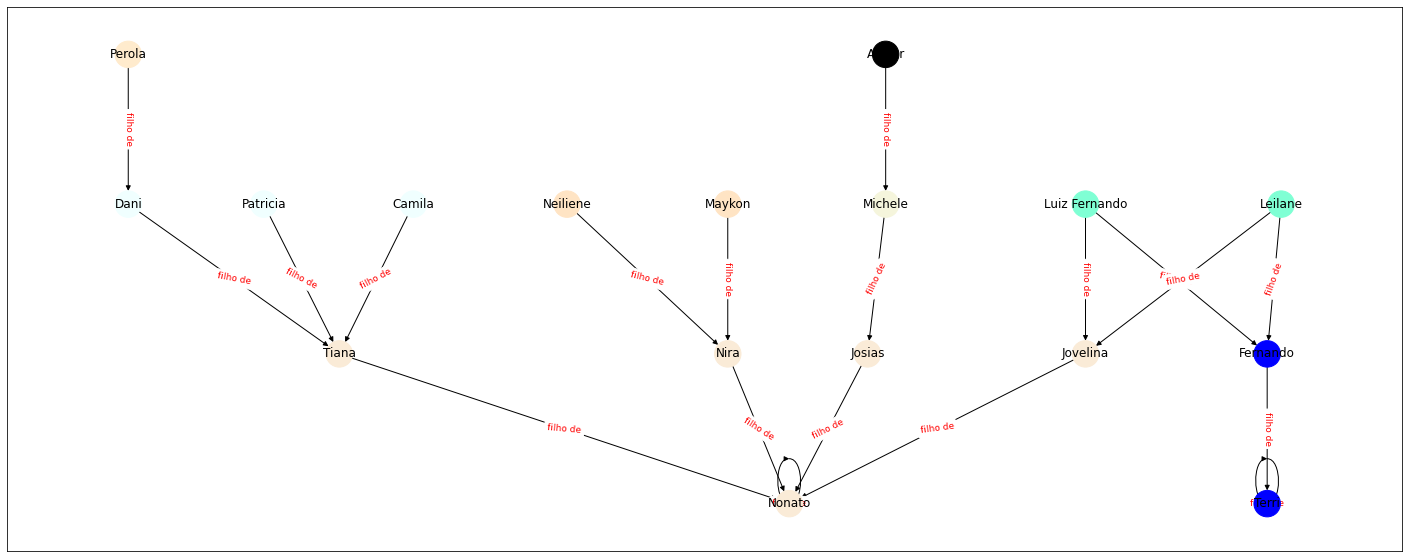

In [14]:
# Biblioteca do NetworkX para a criação de grafos
from networkx.drawing.nx_agraph import graphviz_layout

fig, ax = plt.subplots(figsize=(25,10))

# pos = nx.spring_layout(G)
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot")
# pos = nx.drawing.nx_agraph.pygraphviz_layout(G,prog='fdp')
nx.draw_networkx_edge_labels(G,
                             pos,
                             edge_labels=nx.get_edge_attributes(G,'relation'),
                             label_pos=0.5,
                             font_size=9,
                             font_color='red',
                             font_family='sans-serif',
                             font_weight='normal',
                             alpha=1.0,
                             bbox=None,
                             ax=ax,
                             rotate=True,)

print(G.nodes())
nx.draw_networkx(G,
                pos=pos,
                #font_color="green",
                arrows=True,
                with_labels=True,
                ax=ax,
                nodelist=G.nodes(),
                edgelist=G.edges(),
                node_size=700,
                node_color=[nx.get_node_attributes(G,'color')[g] for g in G.nodes()])



#nx.node_color=[nx.get_node_attributes(G,'color')[g] for g in G.nodes()]
plt.savefig("familia_Graph.jpg", format="jpg", dpi=100)
plt.show()

In [10]:
import json
with open('family.json', 'w') as f:
    f.write(json.dumps(nx.cytoscape_data(G)))

In [11]:
with open('family.json', 'w') as f:
    data = nx.readwrite.json_graph.cytoscape_data(G)

In [12]:
# !pip install pygraphviz